# Python Data Science E-Commerce Analytics

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data_1 = pd.read_csv('#', encoding='unicode_escape')
data_1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
data_1.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [6]:
# To be able to use for the next calculations, 
# we are going to convert 'InvoiceDate' column from object to datetime

data_1['InvoiceDate'] = pd.to_datetime(data_1['InvoiceDate'])

In [8]:
data_1.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [7]:
# For getting rid of meaningless data, 
# we are getting the Price and Quantity as greater than 0

data_1 = data_1[(data_1['UnitPrice'] > 0 ) & (data_1['Quantity'] > 0)]
data_1[data_1['UnitPrice'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


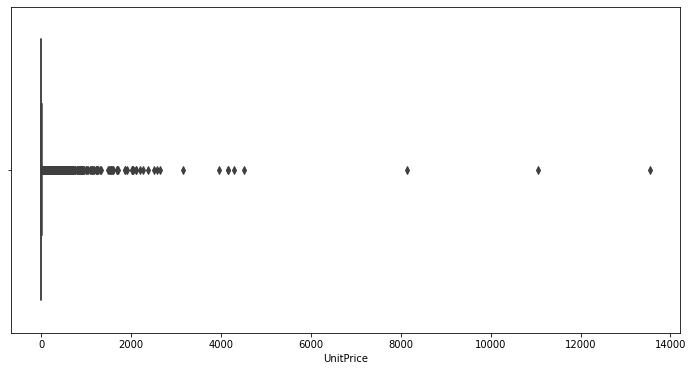

In [8]:
plt.subplots(figsize=(12,6))
sns.boxplot(x=data_1.UnitPrice) # To avoid warning equal the value x or y axis
plt.show()

In [9]:
data_1.groupby(by=['CustomerID', 'Country'])['InvoiceNo'].count().head()

CustomerID  Country       
12346.0     United Kingdom      1
12347.0     Iceland           182
12348.0     Finland            31
12349.0     Italy              73
12350.0     Norway             17
Name: InvoiceNo, dtype: int64

Why did we add 'Country' to Groupby? The reason is that CustomerID could buy something from any country in the database.

In [17]:
data_1['TotalPrice'] = data_1['UnitPrice']*data_1['Quantity']
data_1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,purch_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


TotalPrice = UnitPrice*Quantity

In [16]:
data_1.groupby(by=['CustomerID'], as_index=False)['TotalPrice'].sum().head()

,CustomerID,TotalPrice
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


How to find the total spending of the customers

In [12]:
data_1.groupby(by=['CustomerID'], as_index=True)['TotalPrice'].sum().head()

CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
Name: TotalPrice, dtype: float64

What happens when as_index = False

Text(0.5, 1.0, 'Orders per month')

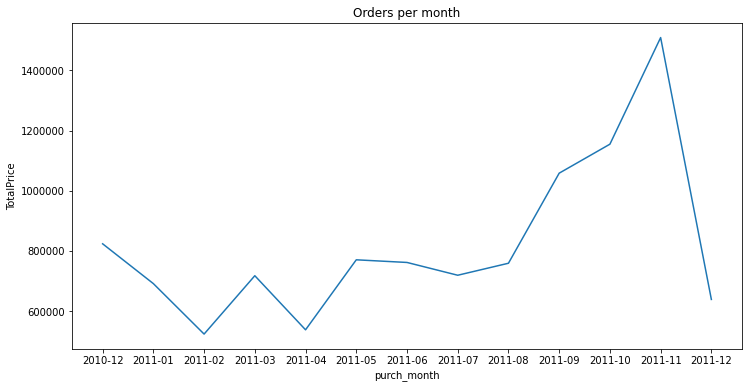

In [22]:
data_1['purch_month'] = data_1.InvoiceDate.dt.to_period('M').astype(str)
order_per_month = data_1.groupby('purch_month', as_index=False).TotalPrice.sum()

fig, ax = plt.subplots(figsize=(12, 6)) #how to set the axis range
plt.ticklabel_format(style='plain') #to change the yticks on the figure,
#mainly change the le6 labeled on the top to 1000000, 2000000, ... on the yaxis

ax = sns.lineplot(x = "purch_month", y="TotalPrice", data=order_per_month)
ax.set_title('Orders per month')

In [25]:
data_2 = data_1.groupby('Country')['InvoiceNo'].count().sort_values(ascending=False)

In [26]:
data_2

Country
United Kingdom          485123
Germany                   9040
France                    8407
EIRE                      7890
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1966
Portugal                  1501
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Unspecified                446
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57


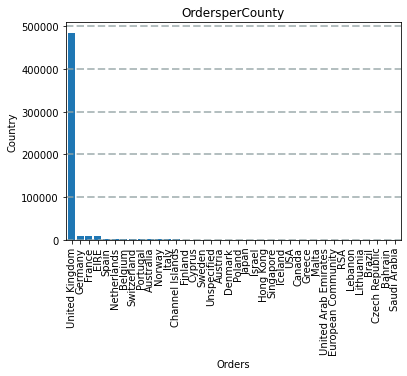

In [36]:
data_2.plot(kind='bar', width=0.8)
plt.xlabel('Orders')
plt.ylabel('Country')
plt.title('OrdersperCounty')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

In [42]:
data_grouped = data_1.groupby(by=['Country','purch_month'], as_index=False)['TotalPrice'].sum()
data_grouped['percentage'] = data_grouped['TotalPrice']/data_grouped['TotalPrice'].sum()
data_per = data_grouped.groupby(by=['Country'], as_index=False)['percentage'].sum().sort_values('percentage',ascending=False)
data_per.head()

,Country,percentage
36,United Kingdom,0.846113
24,Netherlands,0.026761
10,EIRE,0.026574
14,Germany,0.021456
13,France,0.019661


<AxesSubplot:xlabel='purch_month', ylabel='TotalPrice'>

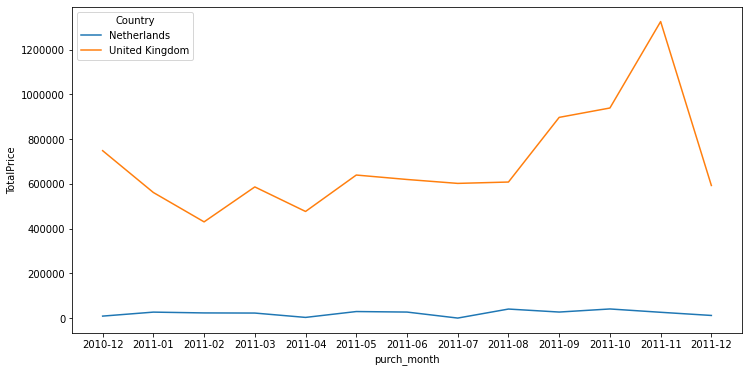

In [45]:
df = data_grouped[data_grouped['Country'].isin(['United Kingdom','Netherlands'])]
plt.figure(figsize=(12,6))
plt.ticklabel_format(style='plain')

sns.lineplot(data=df, x='purch_month', y='TotalPrice',err_style='bars', hue='Country')